# comparisons

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re

def load_data(pattern, field, epoch_from=0, epoch_to=300):
    all_rewards = []
    distilled_rewards = []

    # Use glob to find all files matching the initial pattern
    csv_files = glob.glob(pattern)

    # Filter files where the wildcard is a number using regex
    csv_files_1 = [file for file in csv_files if re.search(r'.*all\d+\.csv$', file)]
    csv_files_2 = [file for file in csv_files if re.search(r'.*allshared_model\d+\.csv$', file)]
    csv_files = csv_files_1 + csv_files_2
    if not csv_files:
        print(f"No files found for pattern: {pattern}")
        return None, None, None, None

    for file in csv_files:
        df = pd.read_csv(file)[epoch_from:epoch_to]
        all_rewards.append(df[field].reset_index(drop=True))
        # Align distilled rewards with the main dataset
        if 'distilled' in df.columns:
            distilled_col = pd.Series([None] * len(df))
            distilled_col[df['distilled']] = df[field][df['distilled']]
            distilled_rewards.append(distilled_col.reset_index(drop=True))

    combined_rewards_df = pd.concat(all_rewards, axis=1)
    mean_reward = combined_rewards_df.mean(axis=1)
    std_reward = combined_rewards_df.std(axis=1)

    if distilled_rewards:
        distilled_rewards_df = pd.concat(distilled_rewards, axis=1)
        distilled_mean_reward = distilled_rewards_df.mean(axis=1)
        distilled_std_reward = distilled_rewards_df.std(axis=1)
    else:
        distilled_mean_reward = None
        distilled_std_reward = None

    return mean_reward, std_reward, distilled_mean_reward, distilled_std_reward

def plot_data(datasets, field, labels, epoch_from=0, epoch_to=300, 
              window_size=10, y_label='Training Reward', plot_shade=True, plot_distilled=False):
    plt.figure(figsize=(10, 6))

    # Define a default set of colors
    colors = plt.cm.tab10.colors

    for i, dataset in enumerate(datasets):
        pattern = dataset['pattern']
        label = labels[i]
        color = colors[i % len(colors)]  # Cycle through colors if more datasets than colors

        mean_reward, std_reward, distilled_mean_reward, distilled_std_reward = load_data(pattern, field, epoch_from, epoch_to)

        if mean_reward is not None and std_reward is not None:
            # Apply smoothing using a rolling window
            smoothed_mean_reward = mean_reward.rolling(window=window_size, min_periods=1).mean()
            smoothed_std_reward = std_reward.rolling(window=window_size, min_periods=1).mean()

            # Plot the smoothed mean and shaded std for the dataset
            plt.plot(smoothed_mean_reward.index, smoothed_mean_reward, color=color, linewidth=2, label=label)
            if plot_shade:
                plt.fill_between(
                    smoothed_mean_reward.index,
                    smoothed_mean_reward - smoothed_std_reward,
                    smoothed_mean_reward + smoothed_std_reward,
                    color=color,
                    alpha=0.15,
                )

        if plot_distilled:
            if distilled_mean_reward is not None and distilled_std_reward is not None:
                # Apply smoothing for distilled rewards
                smoothed_distilled_mean = distilled_mean_reward.rolling(window=window_size, min_periods=1).mean()
                smoothed_distilled_std = distilled_std_reward.rolling(window=window_size, min_periods=1).mean()

                # Plot distilled rewards
                plt.plot(smoothed_distilled_mean.index, smoothed_distilled_mean, linestyle='--', color=color, linewidth=2, label=f'Distilled {label}')
                if plot_shade:
                    plt.fill_between(
                        smoothed_distilled_mean.index,
                        smoothed_distilled_mean - smoothed_distilled_std,
                        smoothed_distilled_mean + smoothed_distilled_std,
                        color=color,
                    )

    # Ensure the legend is always displayed
    plt.xlabel('Episode')
    plt.ylabel(y_label)
    plt.legend()
    plt.grid(True)
    plt.show()



    

# With vs Without Passive Data

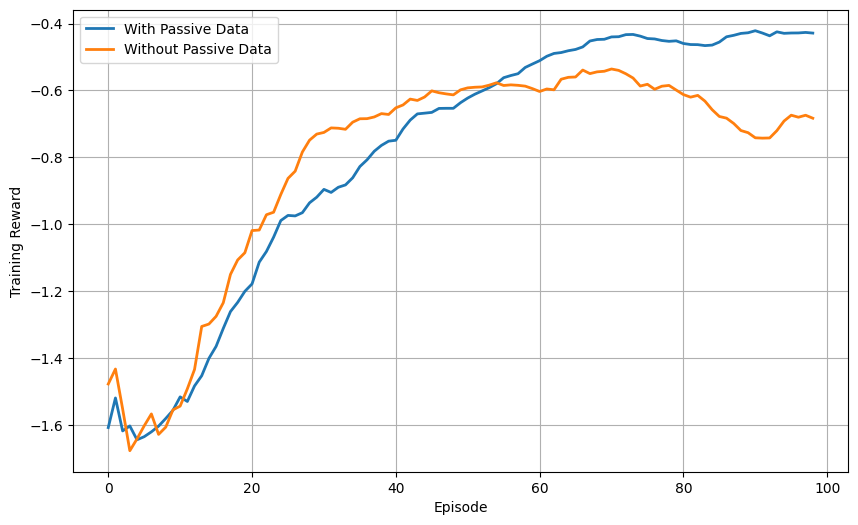

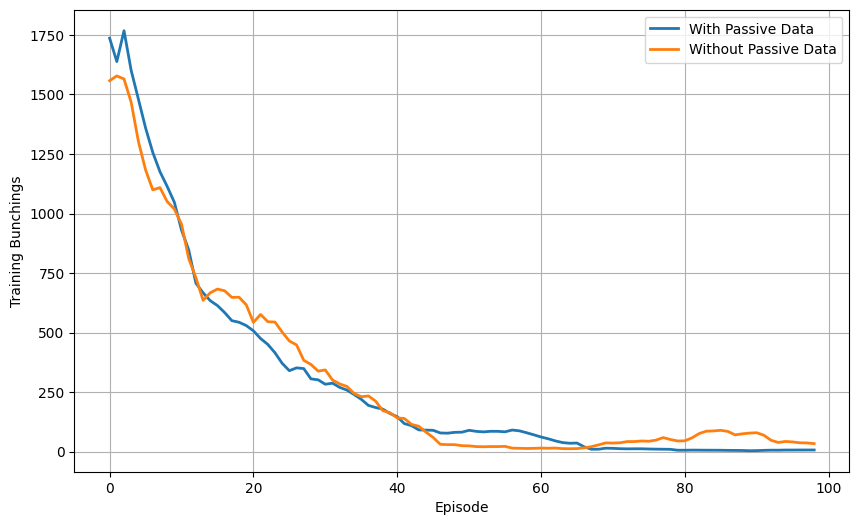

In [23]:
# pattern_mine = './log/A_0_1CAAC_cross_att2all*.csv'
# Example usage
datasets = [
    {'pattern': './log_with_without_passive/A_0_1TD3_Distill2all*.csv'},
    {'pattern': './log_with_without_passive/A_0_1TD3_Distill_ActiveOnly2all*.csv'},
]
labels = ["With Passive Data", "Without Passive Data"]

# plot_rewards(datasets, labels, colors, epoch_from=0, epoch_to=300)
plot_data(datasets, "reward", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=False, y_label='Training Reward')

plot_data(datasets, "bunching", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=False, y_label='Training Bunchings')

# plot_reward(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)
# plot_bunching(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)

# Distill vs One

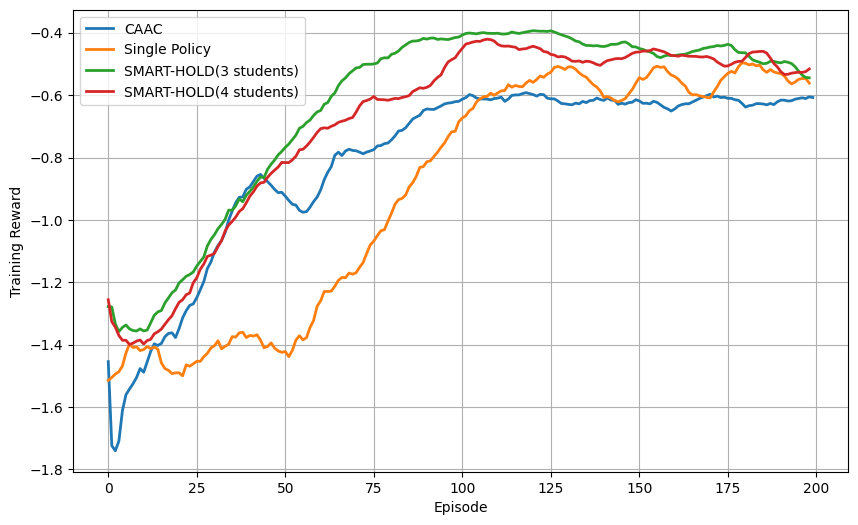

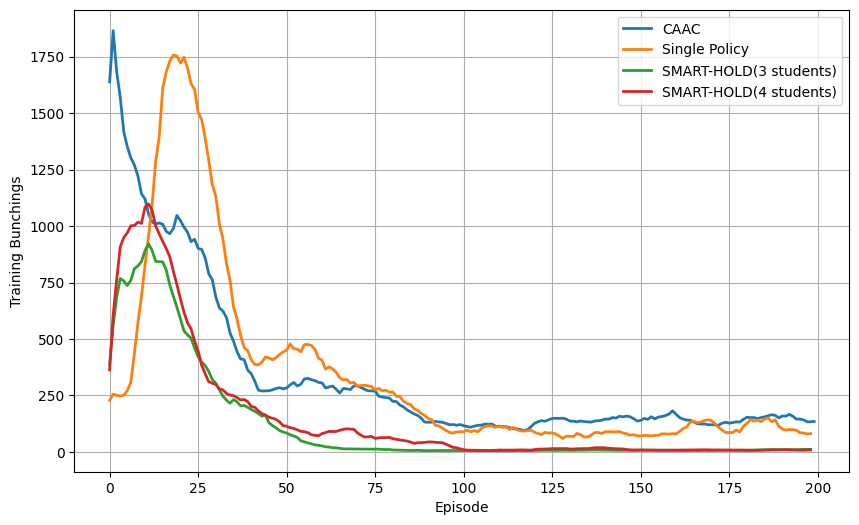

In [22]:
# pattern_mine = './log/A_0_1CAAC_cross_att2all*.csv'
# Example usage
datasets = [
    {'pattern': './log-caac/A_0_1caac_original2all*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_1_students2allshared_model*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_3_students2all*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_4_students2all*.csv'},
#     {'pattern': './log/A_0_1DDPG_Distill_5_students2all*.csv'},
]
labels = ["CAAC", "Single Policy", "SMART-HOLD(3 students)", "SMART-HOLD(4 students)"]

# plot_rewards(datasets, labels, colors, epoch_from=0, epoch_to=300)
plot_data(datasets, "reward", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=False, y_label='Training Reward')

plot_data(datasets, "bunching", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=False, y_label='Training Bunchings')

# plot_reward(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)
# plot_bunching(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)

In [ ]:
# pattern_mine = './log/A_0_1CAAC_cross_att2all*.csv'
# Example usage
datasets = [
    {'pattern': './log_with_without_passive/A_0_1TD3_Distill2all*.csv'},
    {'pattern': './log_with_without_passive/A_0_1TD3_Distill_ActiveOnly2all*.csv'},
]
labels = ["With Passive Data", "Without Passive Data"]

# plot_rewards(datasets, labels, colors, epoch_from=0, epoch_to=300)
plot_data(datasets, "reward", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=True, y_label='Training Reward')

plot_data(datasets, "bunching", labels,  epoch_from=0, epoch_to=200, window_size=10, plot_shade=True, y_label='Training Bunchings')

# plot_reward(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)
# plot_bunching(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)

# ORIGINAL vs Cross-Attention

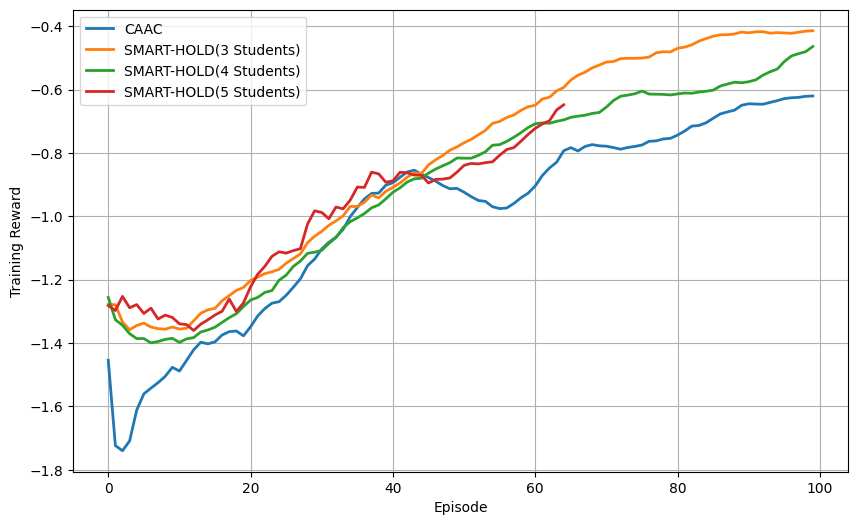

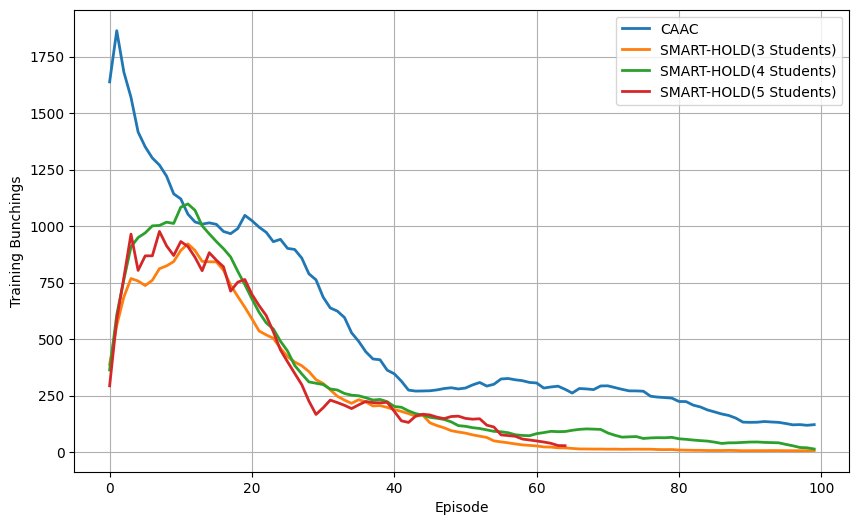

In [78]:
# pattern_mine = './log/A_0_1CAAC_cross_att2all*.csv'
# Example usage
datasets = [
    {'pattern': './log-caac/A_0_1caac_original2all*.csv'},
#     {'pattern': './log_with_without_passive/A_0_1TD3_Distill_ActiveOnly2all*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_3_students2all*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_4_students2all*.csv'},
    {'pattern': './log/A_0_1DDPG_Distill_5_students2all*.csv'},
]
labels = ["CAAC", "SMART-HOLD(3 Students)", "SMART-HOLD(4 Students)", "SMART-HOLD(5 Students)"]

# plot_rewards(datasets, labels, colors, epoch_from=0, epoch_to=300)
plot_data(datasets, "reward", labels,  epoch_from=0, epoch_to=100, window_size=10, plot_shade=False, y_label='Training Reward')

plot_data(datasets, "bunching", labels,  epoch_from=0, epoch_to=100, window_size=10, plot_shade=False, y_label='Training Bunchings')

# plot_reward(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)
# plot_bunching(pattern_mine, pattern_original, "SMART-HOLD", "CAAC", 0, 100)

# ORIGINAL vs Cross-Attention + TD3

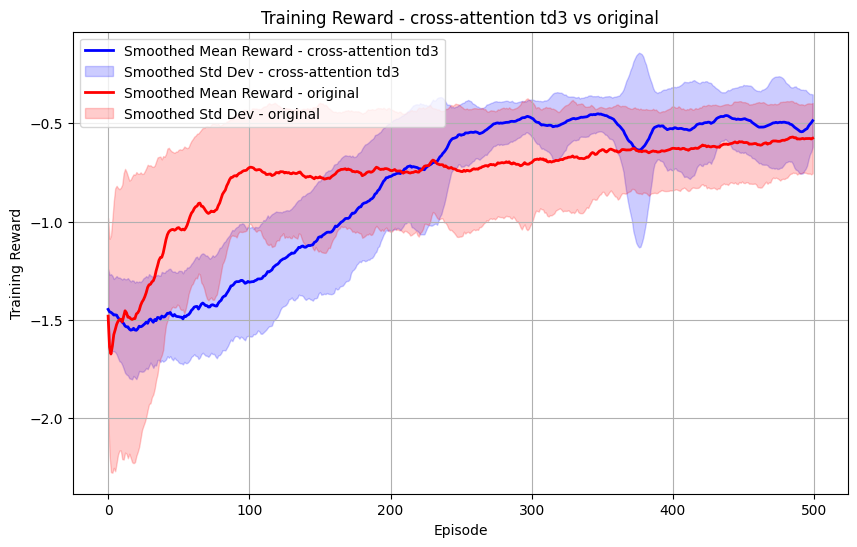

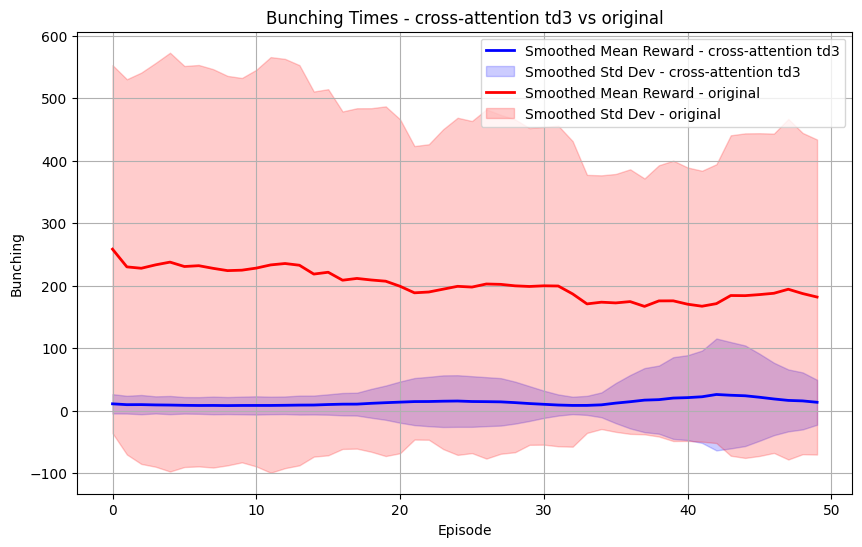

In [13]:
pattern_mine = './log--1105/A_0_1td3-version102all*.csv'
pattern_original = './log--1105/A_0_1caac_original2all*.csv'

plot_reward(pattern_mine, pattern_original, "cross-attention td3", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "cross-attention td3", "original", 450, 500)

# our solution: Original vs combo (cross-attention+td3, extra information, attention both actor and critic)

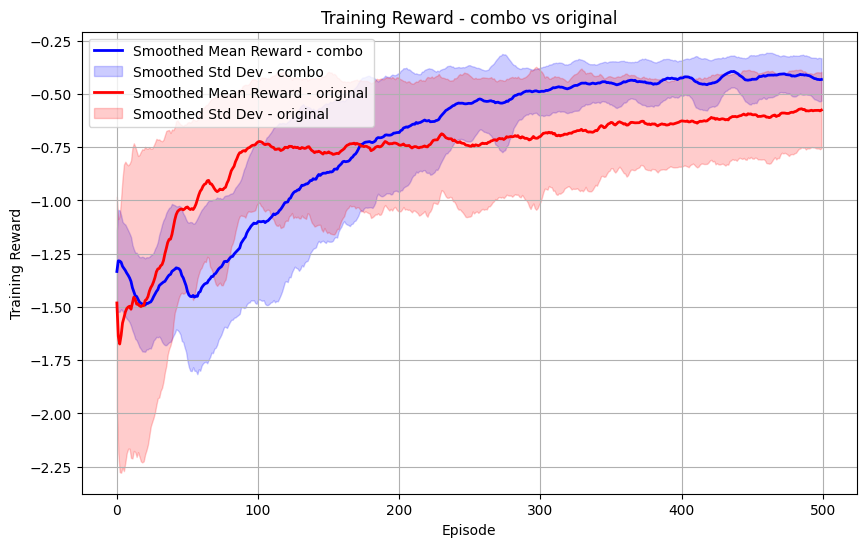

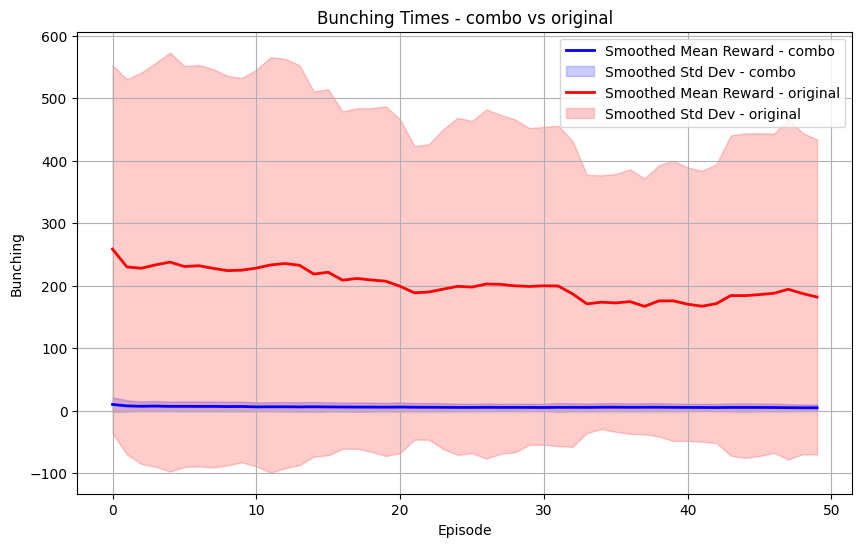

In [3]:
pattern_mine = './log--1105/A_0_1td3-version152all*.csv'
pattern_original = './log--1105/A_0_1caac_original2all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 450, 500)

# cross attn vs combo

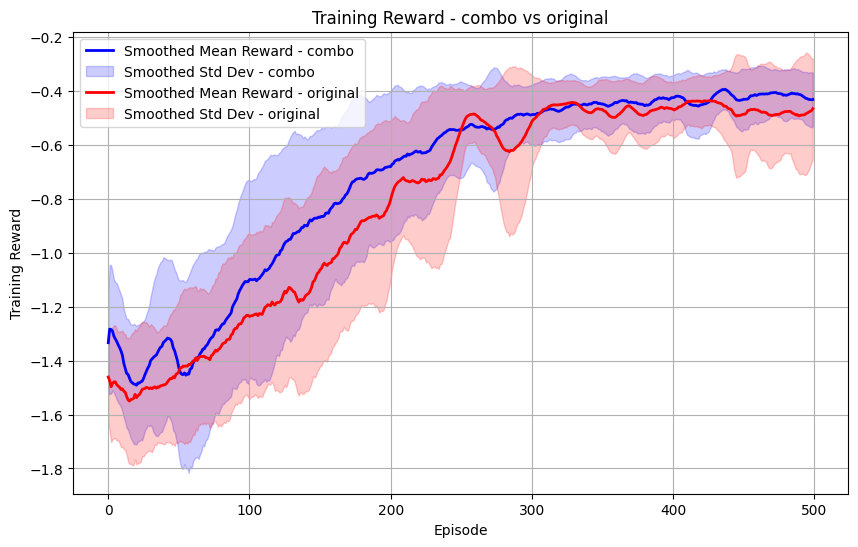

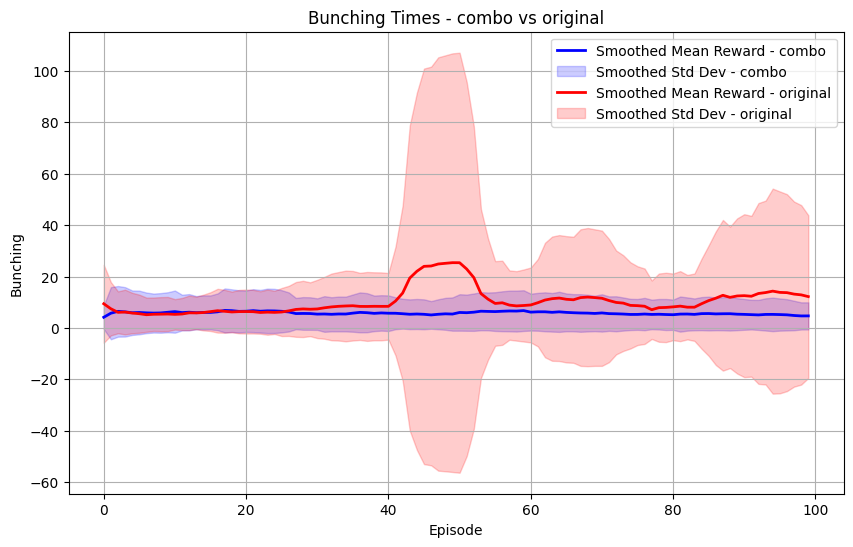

In [17]:
pattern_mine = './log--1105/A_0_1td3-version152all*.csv'
pattern_original = './log--1105/A_0_1td3-version82all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 400, 500)

# Combo (td3+cross attention) vs Distill

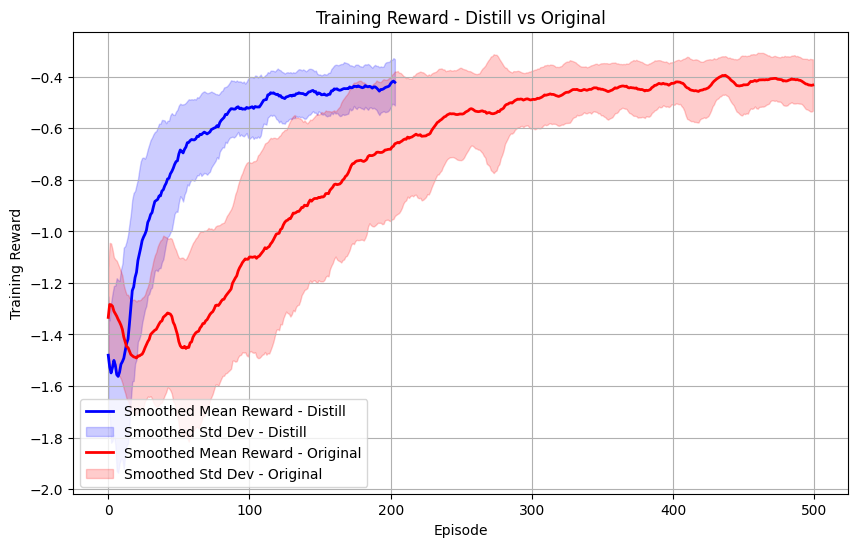

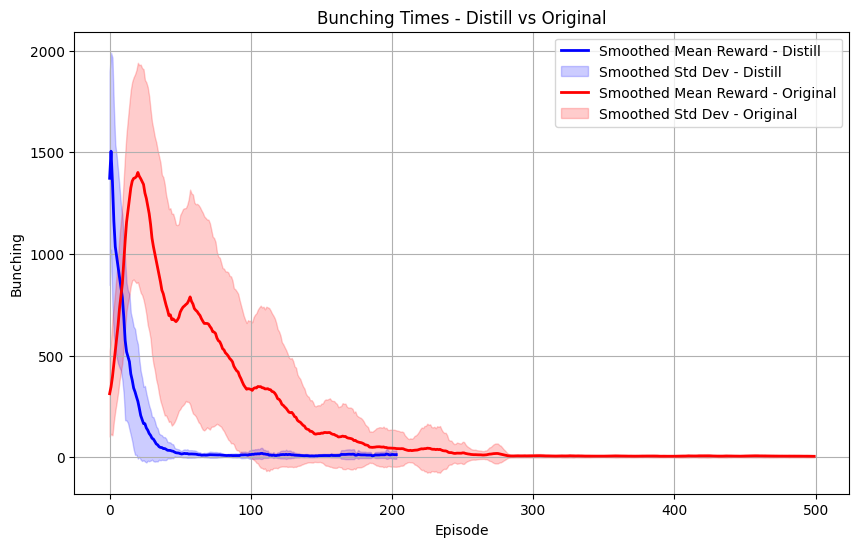

In [10]:
pattern_mine = './log/A_0_1td3-version172all*.csv'
# pattern_original = './log--1105/A_0_1caac_original2all*.csv'
pattern_original = './log--1105/A_0_1td3-version152all*.csv'

plot_reward(pattern_mine, pattern_original, "Distill", "Original", 0, 500)
plot_bunching(pattern_mine, pattern_original, "Distill", "Original", 0, 500)

# version 16 vs 15 (version 16: ego + event for actor_learn )

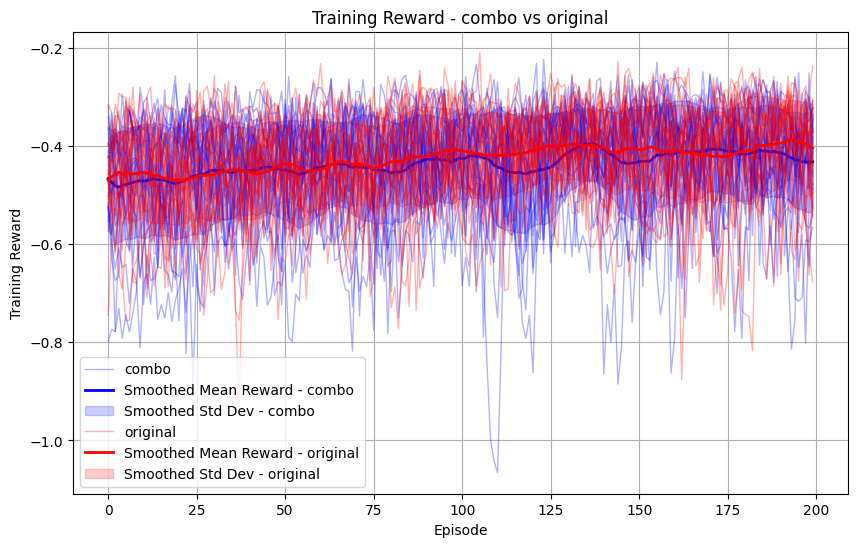

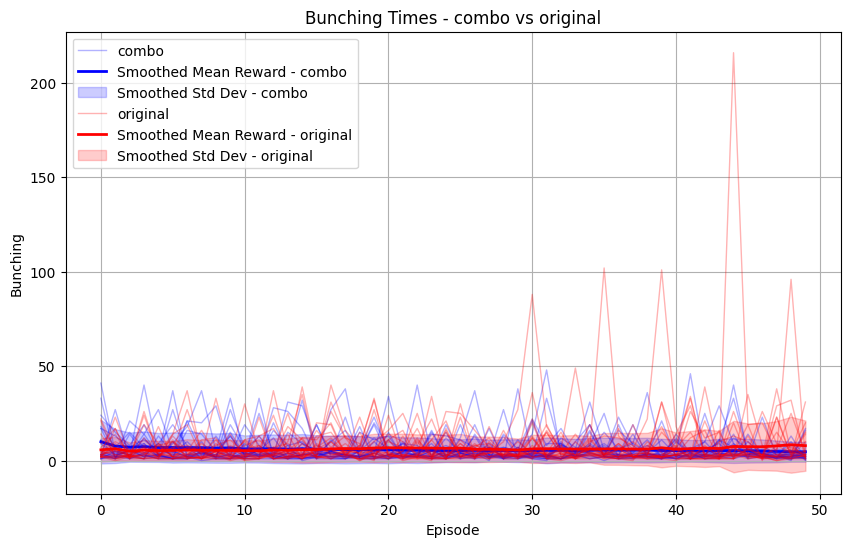

In [41]:
pattern_mine = './log/A_0_1td3-version152all*.csv'
pattern_original = './log/A_0_1td3-version162all*.csv'

plot_reward(pattern_mine, pattern_original, "combo", "original", 300, 500)
plot_bunching(pattern_mine, pattern_original, "combo", "original", 450, 500)